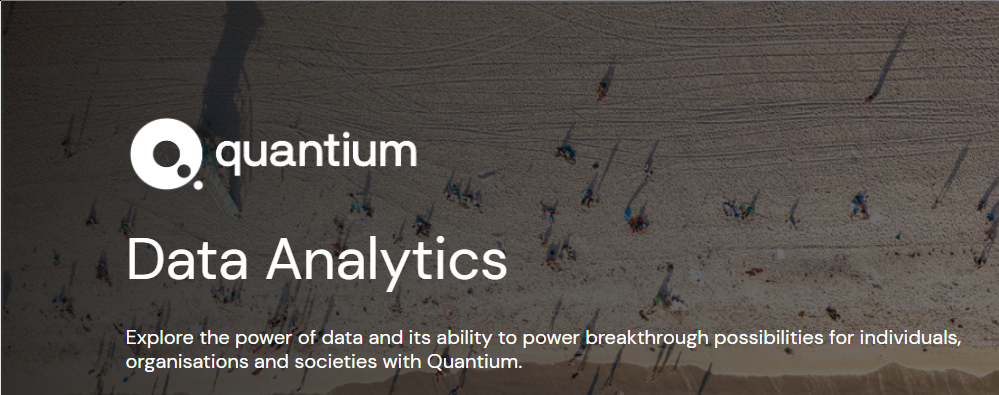

**Business goal:-** The end goal is to form a strategy based on the finding to provide a clear recommendations to **julia** the **categorical Manager** so make sure our insight can have a commercial application.


**Analysis:-**

*  **Types of Machine Learning:-** Supervised Machine Learning
*  **Types of Model:-** Linear Regression, Random Forest, and Decision Tree model
*   **Goal:-** Recommendation which category is best performed
*   




**Table of Context:-**

*   Import Python Libraries
*   Import Data
*   Data Structure Analysis
*   Data cleaning / Identifying the missing value
*   Descriptive Analysis of data
*   Categorical analysis by using of groupby and aggregates function
*   Data preprocessing
*   Label Encoding
*   Defines target and features variable
*   Import train-test-split model
*   Checking shape and size
*   Import Linear Regression, Random Forest Regression and Decision Tree Model
*   Train and fit the Model
*   Model Accuracy and Model Evaluation
*   Model Deployment
*   


**Import Python Libraries:-**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import Data:-**

*   Transaction Data
*   purchase Behaviour Data



In [2]:
transaction = pd.read_csv("/content/Transaction_data.csv")

In [3]:
purchase = pd.read_csv("/content/Purchase_behaviour.csv")

**Transaction Data Formet Analysis:-**

In [4]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
transaction.tail()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
264831,09-03-2019,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,13-08-2018,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,06-11-2018,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,27-12-2018,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8
264835,22-09-2018,272,272380,270189,74,Tostitos Splash Of Lime 175g,2,8.8


In [6]:
transaction.shape
# 264836 Observation and 8 features

(264836, 8)

In [7]:
list(transaction.columns)

['DATE',
 'STORE_NBR',
 'LYLTY_CARD_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES']

In [8]:
transaction.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     72637
TXN_ID            263127
PROD_NBR             114
PROD_NAME            114
PROD_QTY               6
TOT_SALES            112
dtype: int64

In [9]:
transaction.isnull().sum()
# there is not any null value in this dataset

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [10]:
transaction['STORE_NBR'].nunique()

272

In [11]:
transaction['PROD_NAME'].nunique()

114

**Observation:-**

*   In this Transaction Datasets, There are more than **270+ store**
*   And more than **100+ Product Type**



**Descriptive Analysis of Transaction Data:-**

In [12]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,17-10-2018,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,14-05-2019,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,20-05-2019,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,17-08-2018,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,18-08-2018,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


In [14]:
transaction.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


**Store Number and Total Sales Groupby Function:-**

In [15]:
store = transaction.groupby(by="STORE_NBR").agg({"TOT_SALES":"sum"}).reset_index()

In [16]:
store.head()

,STORE_NBR,TOT_SALES
0,1,2393.60
1,2,2005.80
2,3,12802.45
3,4,14647.65
4,5,9500.80


In [17]:
store['TOT_SALES'].sort_values(ascending=False).head()

225    18905.45
87     16333.25
164    15973.75
39     15559.50
236    15539.50
Name: TOT_SALES, dtype: float64

In [18]:
transaction.query("STORE_NBR == 225").head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
168,14-08-2018,225,225242,226134,22,Thins Chips Originl saltd 175g,1,3.3
4186,23-08-2018,225,225031,224843,69,Smiths Chip Thinly S/Cream&Onion 175g,2,6.0
4187,09-12-2018,225,225031,224844,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2
4188,08-02-2019,225,225031,224845,43,Smith Crinkle Cut Bolognese 150g,2,5.2
4189,18-04-2019,225,225031,224846,111,Smiths Chip Thinly Cut Original 175g,2,6.0


**Top 5 Store in Total Sales Based:-**

*   **225** - 18905.00
*   **87** - 16333.00
*   **164** - 15973.00
*   **39** - 15559.00
*   **236** - 15539.00
*   



**Product Name and Total Sales groupby Function:-**

In [19]:
product = transaction.groupby("PROD_NAME").agg({"TOT_SALES":"sum"}).reset_index()

In [20]:
product.head()

,PROD_NAME,TOT_SALES
0,Burger Rings 220g,6831.0
1,CCs Nacho Cheese 175g,5961.9
2,CCs Original 175g,6048.0
3,CCs Tasty Cheese 175g,6069.0
4,Cheetos Chs & Bacon Balls 190g,9243.3


In [21]:
product['TOT_SALES'].sort_values(ascending=False).head()

11    40352.0
86    36367.6
77    34804.2
33    34457.4
76    34302.6
Name: TOT_SALES, dtype: float64

In [22]:
product.loc[11].head()

PROD_NAME    Dorito Corn Chp     Supreme 380g
TOT_SALES                             40352.0
Name: 11, dtype: object

In [23]:
product.loc[86]

PROD_NAME    Smiths Crnkle Chip  Orgnl Big Bag 380g
TOT_SALES                                   36367.6
Name: 86, dtype: object

In [24]:
product.loc[77]

PROD_NAME    Smiths Crinkle Chips Salt & Vinegar 330g
TOT_SALES                                     34804.2
Name: 77, dtype: object

In [25]:
product.loc[33]

PROD_NAME    Kettle Mozzarella   Basil & Pesto 175g
TOT_SALES                                   34457.4
Name: 33, dtype: object

In [26]:
product.loc[76]

PROD_NAME    Smiths Crinkle      Original 330g
TOT_SALES                              34302.6
Name: 76, dtype: object

**Top 5 Product Based on Total Sales:-**

* **Dorito Corn Chp     Supreme 380g**
*  **Smiths Crnkle Chip  Orgnl Big Bag 380g**
*   **Smiths Crinkle Chips Salt & Vinegar 330g**
*   **Kettle Mozzarella   Basil & Pesto 175g**
*   **Smiths Crinkle      Original 330g**
*   



**Purchase Data Formet Analysis:-**

In [27]:
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [28]:
purchase.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [29]:
purchase.shape

(72637, 3)

In [30]:
list(purchase.columns)

['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER']

In [31]:
purchase.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [32]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


**Descriptive Analysis of Purchase Data:-**

In [33]:
purchase.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [34]:
purchase['LIFESTAGE'].unique().tolist()
# there are 7 unique Lifestage of customer

['YOUNG SINGLES/COUPLES',
 'YOUNG FAMILIES',
 'OLDER SINGLES/COUPLES',
 'MIDAGE SINGLES/COUPLES',
 'NEW FAMILIES',
 'OLDER FAMILIES',
 'RETIREES']

In [35]:
purchase['PREMIUM_CUSTOMER'].unique().tolist()
# there are mainly 3 category of customer

['Premium', 'Mainstream', 'Budget']

In [36]:
purchase['LIFESTAGE'].value_counts(ascending=False)

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

Text(0.5, 1.0, 'Lifestage Of Customer')

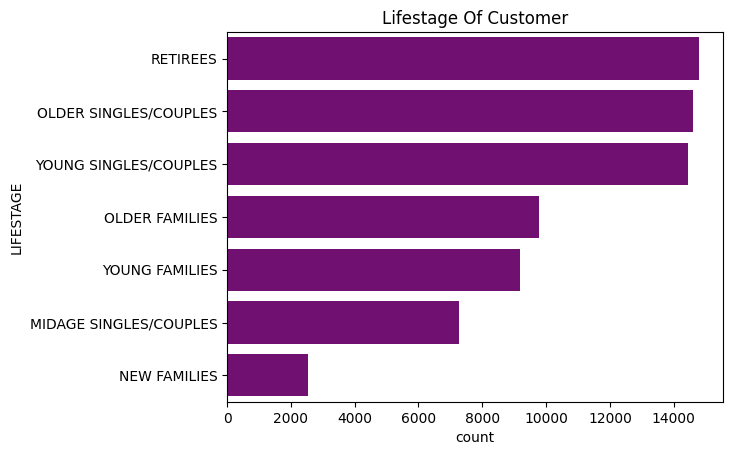

In [37]:
sns.countplot(data=purchase,y=purchase['LIFESTAGE'],color="purple",order=purchase['LIFESTAGE'].value_counts(ascending=False).index)
plt.title("Lifestage Of Customer")

**Observation:-**

*   The Maximum Customer Lifestages are **Retirees**
*   



In [38]:
purchase['PREMIUM_CUSTOMER'].value_counts(ascending=False)

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Category')

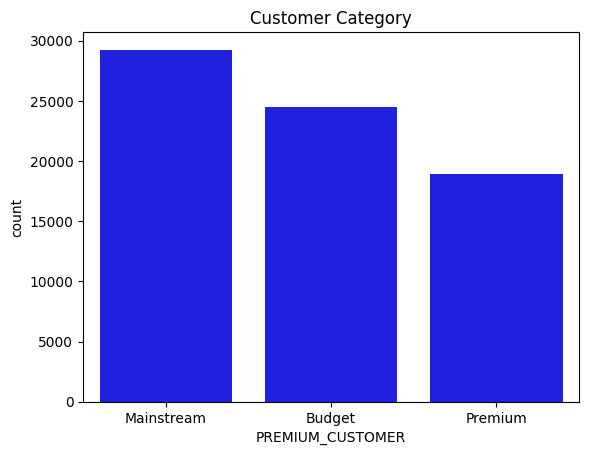

In [39]:
sns.countplot(data=purchase,x=purchase['PREMIUM_CUSTOMER'],color='blue',order=purchase['PREMIUM_CUSTOMER'].value_counts(ascending=False).index)
plt.title("Customer Category")

**Obseravtion:-**

*   **29245** Customer are belong from **Mainstream** Customer Category
*   




Text(0.5, 1.0, 'Premium Customer and Lifestage')

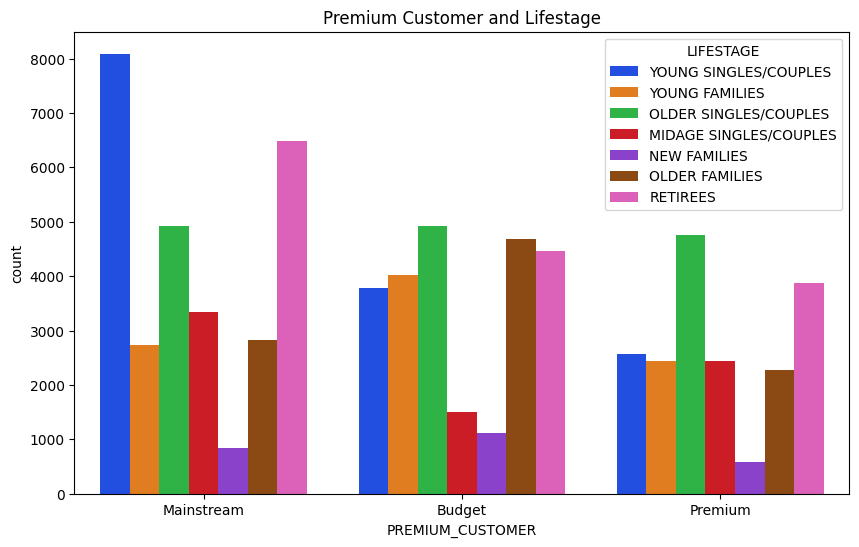

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(data=purchase,x=purchase['PREMIUM_CUSTOMER'],palette="bright",hue=purchase['LIFESTAGE'],order=purchase['PREMIUM_CUSTOMER'].value_counts(ascending=False).index)
plt.title("Premium Customer and Lifestage")

**Observation:-**

*   There are 8000+ **young single/couples** are Purchasing
*   



**New Datasets:-**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
data = pd.read_csv("/content/Dataset.csv")

**Data Formet Analysis:-**

In [43]:
data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [44]:
data.tail()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget
264833,2373711,2018-12-14,88,241815,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330,SMITHS,YOUNG SINGLES/COUPLES,Mainstream


In [45]:
data.shape

(264834, 12)

In [46]:
data.columns.to_list()

['LYLTY_CARD_NBR',
 'DATE',
 'STORE_NBR',
 'TXN_ID',
 'PROD_NBR',
 'PROD_NAME',
 'PROD_QTY',
 'TOT_SALES',
 'PACK_SIZE',
 'BRAND',
 'LIFESTAGE',
 'PREMIUM_CUSTOMER']

In [47]:
data.nunique()

LYLTY_CARD_NBR       72636
DATE                   364
STORE_NBR              272
TXN_ID              263125
PROD_NBR               114
PROD_NAME              114
PROD_QTY                 5
TOT_SALES              111
PACK_SIZE               21
BRAND                   21
LIFESTAGE                7
PREMIUM_CUSTOMER         3
dtype: int64

In [48]:
data.isnull().sum()

LYLTY_CARD_NBR      0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [49]:
data['STORE_NBR'].value_counts(ascending=False).head()

STORE_NBR
226    2020
88     1873
93     1832
165    1819
237    1785
Name: count, dtype: int64

**Observation:-**

*   The highest transaction done by store number **226** is more than **2000+ transaction**
*   And the **second highest Transaction 1800+** is Done by store number **88**



**Python Query Function Used:-**

**Task:-**Julia has asked us to evaluate the performance of a store trial which was performed in stores **77, 86 and 88**

In [50]:
data.head(2)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


**Pandas Groupby and Aggregate Function Used:-**

In [51]:
data.head(2)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


In [52]:
data.shape
# There are 264834 Rows and 12 columns

(264834, 12)

**Store Number and Total Sales Groupby Function:-**

In [53]:
store_agg = data.groupby(by="STORE_NBR").agg({"TOT_SALES":"sum"}).reset_index()

In [54]:
store_agg.head()

,STORE_NBR,TOT_SALES
0,1,2393.60
1,2,2005.80
2,3,12802.45
3,4,14647.65
4,5,9500.80


In [55]:
store_agg.shape

(272, 2)

In [56]:
data['STORE_NBR'].nunique()

272

In [57]:
store_agg['TOT_SALES'].sort_values(ascending=False)

225    17605.45
87     16333.25
164    15973.75
39     15559.50
236    15539.50
         ...   
205        7.60
251        7.40
10         6.70
75         6.00
210        5.20
Name: TOT_SALES, Length: 272, dtype: float64

**Observation:-**

*   The store Number **226** is the highest revenue generating store , **total sales are 17605.45**
*   **2nd Highest Store is 88** with Total sales is **16333.25**
*   Store Number **77**, Sales are **3040.00**
*   Store Number **86**, Sales are **10635.35**
*   Store Number **88**, Sales are **16333.25** **(2nd heighest)**
*   



**Product Name and Total Sales Groupby Function:-**

In [58]:
product_agg = data.groupby(by="PROD_NAME").agg({"TOT_SALES":"sum"}).reset_index()

In [59]:
product_agg.head()

,PROD_NAME,TOT_SALES
0,Burger Rings 220g,6831.0
1,CCs Nacho Cheese 175g,5961.9
2,CCs Original 175g,6048.0
3,CCs Tasty Cheese 175g,6069.0
4,Cheetos Chs & Bacon Balls 190g,9243.3


In [60]:
product_agg['TOT_SALES'].sort_values(ascending=False).head()

11    39052.0
86    36367.6
77    34804.2
33    34457.4
76    34302.6
Name: TOT_SALES, dtype: float64

In [61]:
product_agg.loc[11]

PROD_NAME    Dorito Corn Chp     Supreme 380g
TOT_SALES                             39052.0
Name: 11, dtype: object

In [62]:
product_agg.loc[86]

PROD_NAME    Smiths Crnkle Chip  Orgnl Big Bag 380g
TOT_SALES                                   36367.6
Name: 86, dtype: object

In [63]:
product_agg.loc[77]

PROD_NAME    Smiths Crinkle Chips Salt & Vinegar 330g
TOT_SALES                                     34804.2
Name: 77, dtype: object

**Obseravtion:-**

*   The Highest Revenue generating product name **Dorito Corn Chp Supreme 380g** with **sales amount is 39052.00**
*   The Second heighest Revenue generating product name **Smiths Crnkel Chip Orgnl Big Bag 380g** with **Sales amount is 36367.60**



**Business Insight From Dataset:-**

*   Total Sales Revenue **1933114.99**
*   Total Number of Customer **72636**
*   Average Number of transaction per customer is **2+**
*   



**Date and Total Sales Groupby Function used:-**

In [64]:
data.head(2)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


In [65]:
date_agg = data.groupby(by="DATE").agg({"TOT_SALES":"sum"}).reset_index()

In [66]:
date_agg.head(3)

,DATE,TOT_SALES
0,2018-07-01,5372.2
1,2018-07-02,5315.4
2,2018-07-03,5321.8


<Axes: xlabel='DATE', ylabel='TOT_SALES'>

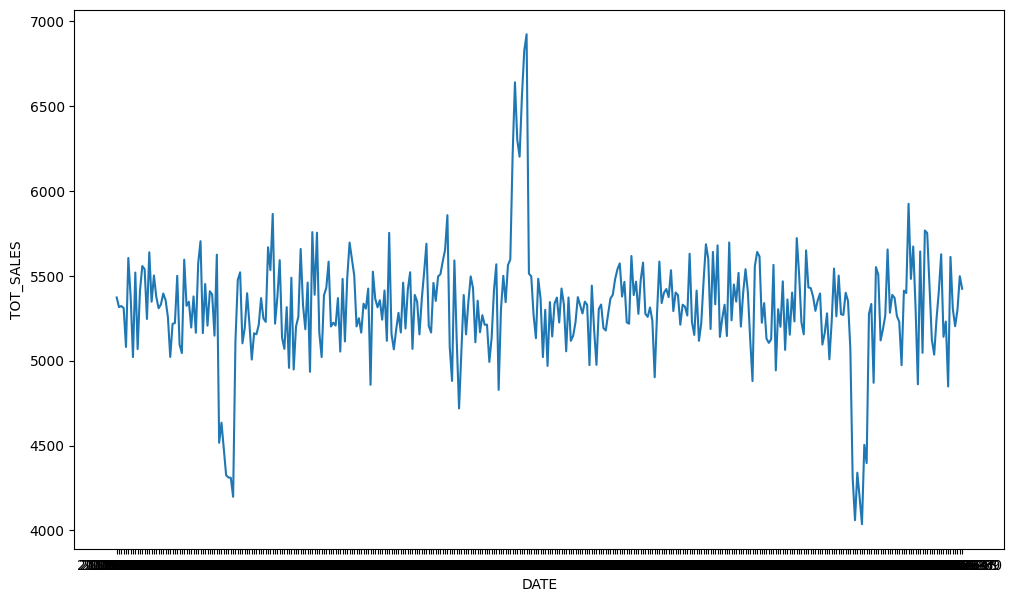

In [67]:
plt.figure(figsize=(12,7))
sns.lineplot(data=date_agg,x=date_agg["DATE"],y=date_agg['TOT_SALES'])

In [68]:
date_agg.shape

(364, 2)

In [69]:
date_agg['TOT_SALES'].sort_values(ascending=False).head(3)

176    6923.0
175    6826.0
171    6639.8
Name: TOT_SALES, dtype: float64

In [70]:
date_agg.loc[176]

DATE         2018-12-24
TOT_SALES        6923.0
Name: 176, dtype: object

**Observation:-**

*   The highest sale is generated by the month of **"24th of December"**
*   
   
   



<Axes: xlabel='PROD_QTY', ylabel='TOT_SALES'>

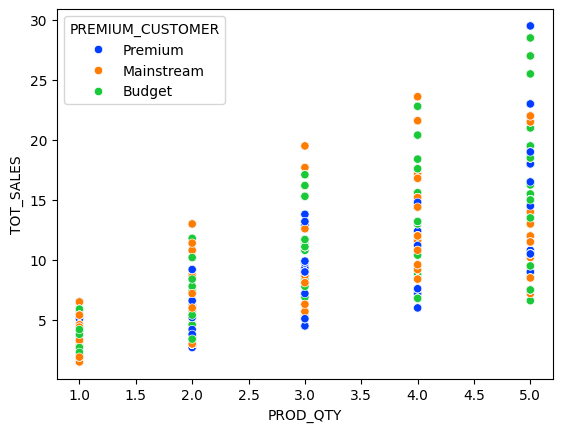

In [71]:
sns.scatterplot(data=data,x=data['PROD_QTY'],y=data['TOT_SALES'],hue=data['PREMIUM_CUSTOMER'],palette='bright')

**Observation:-**

*   With incresing of Product quanity is also increaing of Total Sales
*   



**Brand and Total Sales Groupby Function:-**

In [72]:
brand = data.groupby(by="BRAND").agg({'TOT_SALES':"sum"}).reset_index()

In [73]:
brand.head(3)

,BRAND,TOT_SALES
0,BURGER,6831.0
1,CCS,18078.9
2,CHEETOS,16884.5


In [74]:
brand.shape

(21, 2)

In [75]:
brand['TOT_SALES'].sort_values(ascending=False).head()

9     390239.8
5     240590.9
14    224660.2
12    177655.5
8      99047.6
Name: TOT_SALES, dtype: float64

In [76]:
brand.loc[9]

BRAND          KETTLE
TOT_SALES    390239.8
Name: 9, dtype: object

In [77]:
brand.loc[5]

BRAND         DORITOS
TOT_SALES    240590.9
Name: 5, dtype: object

**Observation:-**

*   The **1st Highest Sales** Brand is **KETTLE**
*   The **2nd Highest Sales Brand** is **DORITOS**



**Lifestage and Total Sales Groupby Function:-**

In [78]:
stage = data.groupby(by='LIFESTAGE').agg({'TOT_SALES':'sum'}).reset_index()

In [79]:
stage.head()

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,184751.30
1,NEW FAMILIES,50433.45
2,OLDER FAMILIES,352467.20
3,OLDER SINGLES/COUPLES,402426.75
4,RETIREES,366470.90


In [80]:
stage['TOT_SALES'].sort_values(ascending=False).head()

3    402426.75
4    366470.90
2    352467.20
5    316160.10
6    260405.30
Name: TOT_SALES, dtype: float64

In [81]:
stage.loc[3]

LIFESTAGE    OLDER SINGLES/COUPLES
TOT_SALES                402426.75
Name: 3, dtype: object

In [82]:
stage.loc[4]

LIFESTAGE    RETIREES
TOT_SALES    366470.9
Name: 4, dtype: object

**Observation:-**

*   **Older Singles/Couples** are generating maximum revenue
*   **Retirees** are 2nd position in generating maximum revenue



**Premium Customer and Total Sales Groupby Function:-**

In [83]:
premium = data.groupby(by='PREMIUM_CUSTOMER').agg({'TOT_SALES':'sum'}).reset_index()

In [84]:
premium.head()

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,676211.55
1,Mainstream,750744.50
2,Premium,506158.95


In [85]:
premium['TOT_SALES'].sort_values(ascending=False)

1    750744.50
0    676211.55
2    506158.95
Name: TOT_SALES, dtype: float64

In [86]:
premium.loc[1]

PREMIUM_CUSTOMER    Mainstream
TOT_SALES             750744.5
Name: 1, dtype: object

**Obseravtion:-**

*   From Premium Customer Category, the **mainstream category** are generating highest revenue amount is **750744.**
*   



**Drop the Unnessary Columns From the Data Frame:-**

*   Lylty Card Number
*   Date
*   Prod Name
*   



In [87]:
data = data.drop(columns="LYLTY_CARD_NBR")
data = data.drop(columns="DATE")
data = data.drop(columns="PROD_NAME")

In [88]:
data.head(2)

,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1,5,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1,2,58,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


<Axes: xlabel='TOT_SALES', ylabel='PACK_SIZE'>

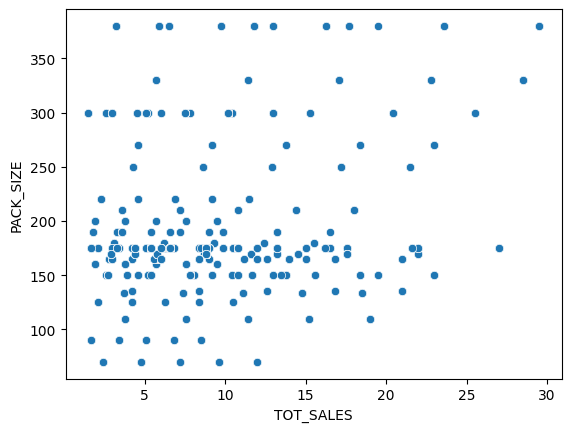

In [89]:
sns.scatterplot(data=data,x=data['TOT_SALES'],y=data['PACK_SIZE'])

**Import Preprocessing and Label Incoding From Machine Learning:-**

In [90]:
from sklearn import preprocessing

In [91]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [92]:
data['BRAND'].unique()
# There are 21 Unique Brand

array(['NATURAL', 'RRD', 'GRNWVES', 'WOOLWORTHS', 'CHEETOS', 'INFUZIONS',
       'DORITOS', 'OLD', 'SMITHS', 'KETTLE', 'CCS', 'TOSTITOS', 'COBS',
       'BURGER', 'THINS', 'TYRRELLS', 'CHEEZELS', 'TWISTIES', 'SUNBITES',
       'PRINGLES', 'FRENCH'], dtype=object)

**Brand Label Encoding:-**

In [93]:
data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

**Lifestage Label Encoding:-**

In [94]:
data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

**Premium Customer Label Encoding:-**

In [95]:
data.head(2)

,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1,5,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1,2,58,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


**Label Encoding List:-**

*   Brand
*   Lifestage
*   Premium Customer
*   



In [96]:
data['BRAND'] = le.fit_transform(data['BRAND'])
data['LIFESTAGE'] = le.fit_transform(data['LIFESTAGE'])
data['PREMIUM_CUSTOMER'] = le.fit_transform(data['PREMIUM_CUSTOMER'])

In [97]:
data.head()

,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1,5,2,6.0,175,10,6,2
1,1,2,58,1,2.7,150,13,6,1
2,1,3,52,1,3.6,210,7,5,0
3,1,4,106,1,3.0,175,10,5,0
4,1,5,96,1,1.9,160,20,3,1


In [98]:
data.isnull().sum()

STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [99]:
data = data.fillna(value=0)

In [100]:
data.columns

Index(['STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE',
       'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [101]:
# Define Target (y) and features (x)

In [102]:
x = data[['STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'PACK_SIZE',
       'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER']]
y = data['TOT_SALES']

In [103]:
# Import train-test-split model

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=2529)

In [105]:
# Shape check

In [106]:
x_train.shape

(211867, 8)

In [107]:
x_test.shape

(52967, 8)

In [108]:
y_train.shape

(211867,)

In [109]:
y_test.shape

(52967,)

In [110]:
# Import Linear Regression , Decisiontree regressor, Randomforest regressor

**Import Linear Regression Model From Machine Learning:-**

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [112]:
# Train and Fit the model

In [113]:
model.fit(x_train,y_train)

LinearRegression()

In [114]:
model.intercept_

-1.3235951675659106

In [115]:
model.coef_

array([-1.95983322e-03,  1.87132959e-06, -3.04714118e-03,  3.87128386e+00,
        1.48699573e-02, -1.20396478e-01,  8.23084438e-03,  1.90278536e-02])

In [116]:
# Model predict

In [117]:
model.predict(x_test)

array([ 6.91985341,  8.39841879,  8.21675203, ..., 11.50898514,
        7.40208911,  9.6593965 ])

In [118]:
y_pred = model.predict(x_test)

In [119]:
y_pred.shape

(52967,)

In [120]:
# Model Accuracy Test and Model Evaluation

In [121]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [122]:
mean_absolute_error(y_test,y_pred)
# lower indicate the better performance of accuracy

1.454791074497992

In [123]:
mean_absolute_percentage_error(y_test,y_pred)
# lower indicate the better performance accuracy
# 76 % Accuracy in Prediction

0.24562280193913974

In [124]:
mean_squared_error(y_test,y_pred)
# lower indicate the better performance of accuracy

3.350349246505216

**Import the Random Forest Regression:-**

In [125]:
data.head()

,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1,5,2,6.0,175,10,6,2
1,1,2,58,1,2.7,150,13,6,1
2,1,3,52,1,3.6,210,7,5,0
3,1,4,106,1,3.0,175,10,5,0
4,1,5,96,1,1.9,160,20,3,1


In [126]:
data.columns

Index(['STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE',
       'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [127]:
# Decide features (x) and Target (y)

In [128]:
x2 = data[['STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'PACK_SIZE',
       'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER']]
y2 = data['TOT_SALES']

In [129]:
# import train-test-split model

In [130]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,train_size=0.75,random_state=2529)

In [131]:
x2_train.shape

(198625, 8)

In [132]:
x2_test.shape

(66209, 8)

In [133]:
y2_train.shape

(198625,)

In [134]:
y2_test.shape

(66209,)

In [135]:
# Import Random Forest regression Model

In [136]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(max_leaf_nodes=15)

In [137]:
# train and fit Model

In [138]:
model2.fit(x2_train,y2_train)

RandomForestRegressor(max_leaf_nodes=15)

In [139]:
# Model Predict

In [140]:
model2.predict(x2_test)

array([ 7.44291539,  3.56251653,  6.49926735, ..., 10.22805515,
        8.32221937,  3.70937705])

In [141]:
y_pred2 = model2.predict(x2_test)

In [142]:
# Model Evaluation

In [143]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [144]:
mean_absolute_error(y2_test,y_pred2)

0.37369251436621387

In [145]:
mean_squared_error(y2_test,y_pred2)

0.5683031358298088

In [146]:
mean_absolute_percentage_error(y2_test,y_pred2)

0.07058902644815937

**Import Decision Tree Model From Machine Learning:-**

In [147]:
data.head()

,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1,1,5,2,6.0,175,10,6,2
1,1,2,58,1,2.7,150,13,6,1
2,1,3,52,1,3.6,210,7,5,0
3,1,4,106,1,3.0,175,10,5,0
4,1,5,96,1,1.9,160,20,3,1


In [148]:
data.columns

Index(['STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE',
       'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [149]:
# Define features (x) and Target (y)

In [150]:
x3 = data[['STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'PACK_SIZE',
       'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER']]
y3 = data['TOT_SALES']

In [151]:
# Import Train-test-split Model

In [152]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,train_size=0.8,random_state=2529)

In [153]:
# Shape check

In [154]:
x3_train.shape

(211867, 8)

In [155]:
x3_test.shape

(52967, 8)

In [156]:
y3_train.shape

(211867,)

In [157]:
y3_test.shape

(52967,)

In [158]:
# Import Decision tree Regression model

In [159]:
from sklearn.tree import DecisionTreeRegressor,plot_tree
model3 = DecisionTreeRegressor(max_leaf_nodes=15)

In [160]:
# Model train and fit

In [161]:
model3.fit(x3_train,y3_train)

DecisionTreeRegressor(max_leaf_nodes=15)

In [162]:
# Model Predict

In [163]:
model3.predict(x3_test)

array([ 7.44400863,  3.56223905,  6.49749765, ..., 11.77240635,
        7.92095599, 11.77240635])

In [164]:
y_pred3 = model3.predict(x3_test)

In [165]:
# Model Accuracy and Evaluation

In [166]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [167]:
mean_absolute_error(y3_test,y_pred3)

0.41458220333093265

In [168]:
mean_squared_error(y3_test,y_pred3)

0.6027255354122272

In [169]:
mean_absolute_percentage_error(y3_test,y_pred3)

0.0762744930654097

**Plot Decision Tree Graph:-**

In [170]:
import sklearn.tree as tree

In [171]:
import matplotlib.pyplot as plt

In [172]:
data.columns

Index(['STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE',
       'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

[Text(0.671875, 0.9444444444444444, 'PROD_QTY <= 1.5\nsquared_error = 6.384\nsamples = 211867\nvalue = 7.298'),
 Text(0.609375, 0.8333333333333334, 'squared_error = 1.247\nsamples = 22018\nvalue = 3.712'),
 Text(0.734375, 0.8333333333333334, 'PACK_SIZE <= 315.0\nsquared_error = 5.316\nsamples = 189849\nvalue = 7.714'),
 Text(0.671875, 0.7222222222222222, 'BRAND <= 19.5\nsquared_error = 4.277\nsamples = 176181\nvalue = 7.399'),
 Text(0.609375, 0.6111111111111112, 'BRAND <= 11.5\nsquared_error = 3.561\nsamples = 165882\nvalue = 7.637'),
 Text(0.34375, 0.5, 'BRAND <= 8.5\nsquared_error = 3.882\nsamples = 88972\nvalue = 8.264'),
 Text(0.125, 0.3888888888888889, 'BRAND <= 3.5\nsquared_error = 2.278\nsamples = 47082\nvalue = 7.176'),
 Text(0.0625, 0.2777777777777778, 'squared_error = 0.984\nsamples = 7419\nvalue = 4.828'),
 Text(0.1875, 0.2777777777777778, 'PACK_SIZE <= 172.5\nsquared_error = 1.296\nsamples = 39663\nvalue = 7.615'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.974\ns

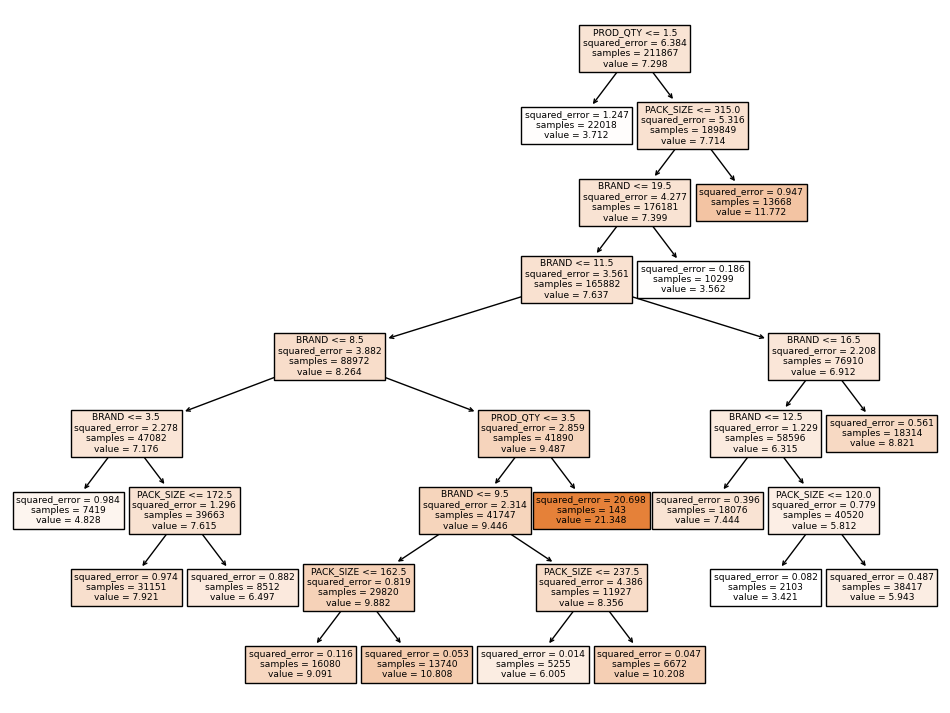

In [173]:
plt.figure(figsize=(12,9))
tree.plot_tree(model3,feature_names=('STORE_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'PACK_SIZE',
       'BRAND', 'LIFESTAGE', 'PREMIUM_CUSTOMER'),class_names=('TOT_SALES'),filled=True,impurity=True)

**Business Insight:-**

*   There are more that **100+ Product type**
*   **Store no 226** is highest sales with **17605.45**
*   **Donito corn chp supreme 380g** product is highest sales with **39052.00**
*   **29000+** customer are belong from **mainstrean category**
*   From **mainstream** category **Older singles/couple**s are more purchasing times
*   **Average number of transaction** per customer is **2+**
*   The highest sales generated by the month of **24th December**
*   1st highest sales brand is **KETTLE**





**Poject Conclusion:-**

*  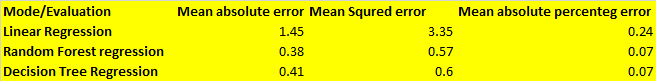

*   The **Random Forest Regression and Decision Tree regression** Model are best fit For this Project.
*   **Random Forest regression Accuracy Percentage is 93%**
*   **Decision Tree regression Accuracy Precentage is 93%**
*   
*   

